# Project: Wrangling and Analyze Data

## Data Gathering

There are three different types of data for this project, each with different data format. 

    1) WeRateDogs twitter archive data in a csv format
    2) Tweet image prediction in tsv format
    3) WeRateDogs twitter account additional datatweet to be stored as tweet_json.txt file

In [1]:
# load imports for data gathering
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import pandas as pd # loads pandas library
import requests # loads requests library
import json # loads json library
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**1.** Directly download the WeRateDogs Twitter archive data (**twitter_archive_enhanced.csv**)

According to Udacity, WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for you to use in this project. The archive contains basic tweet data for over 5000 of their tweets as they stood on August 1, 2017.

I downloaded csv file provided via the link, and then uploaded into my working directory

In [2]:
# twitter_archive_enhanced.csv
twitter_archive=pd.read_csv('twitter_archive_enhanced.csv')

**'twitter-archive-enhanced.csv'**

**2.** Use the Requests library to download the tweet image prediction (**image_predictions.tsv**)

The WeRateDogs tweet image predictions is hosted on Udacity’s servers and is to be downloaded programmatically using requests library via url

In [3]:
# url for image_predictions.tsv
file_url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
# store resquest response in tsv_response
tsv_response=requests.get(file_url)
# write the response to 'image_predictions.tsv'
with open('image_predictions.tsv', 'w') as f:
    f.write(tsv_response.text)

**'image_predictions.tsv'**

**3.** Use the Tweepy library to query additional data via the Twitter API (**tweet_json.txt**)

There are two methods of getting this additional data. Either, through Twitter API and the python tweepy library or direct download of txt file provided by the udacity in the classroom

Twitter API

In [4]:
# Authentication process to use Tweepy API
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [5]:
# Creating list of tweet ids
tweet_id = twitter_archive['tweet_id']
list(tweet_id)

[892420643555336193,
 892177421306343426,
 891815181378084864,
 891689557279858688,
 891327558926688256,
 891087950875897856,
 890971913173991426,
 890729181411237888,
 890609185150312448,
 890240255349198849,
 890006608113172480,
 889880896479866881,
 889665388333682689,
 889638837579907072,
 889531135344209921,
 889278841981685760,
 888917238123831296,
 888804989199671297,
 888554962724278272,
 888202515573088257,
 888078434458587136,
 887705289381826560,
 887517139158093824,
 887473957103951883,
 887343217045368832,
 887101392804085760,
 886983233522544640,
 886736880519319552,
 886680336477933568,
 886366144734445568,
 886267009285017600,
 886258384151887873,
 886054160059072513,
 885984800019947520,
 885528943205470208,
 885518971528720385,
 885311592912609280,
 885167619883638784,
 884925521741709313,
 884876753390489601,
 884562892145688576,
 884441805382717440,
 884247878851493888,
 884162670584377345,
 883838122936631299,
 883482846933004288,
 883360690899218434,
 883117836046

I successfuly applied for Twitter API v2 Essential, but it has limitated usage. I am unable to use it to acquire the data. Therefore, i have requested for Elevation but not yet approved.

- I downloaded the tweet_json.txt provided in the Udacity classroom 

In [6]:
# file url
file_url='https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
# store resquest response in txt_response
txt_response=requests.get(file_url)
# write the response to 'tweet_json.txt'
with open('tweet_json.txt', 'w') as f:
    f.write(txt_response.text)

**'tweet_json.txt'**

I read the tweet_json.txt file by converting each json string into python dictionary and appending them to a twitter_list. Finally, I convert this list of dictionaries to a python pandas DataFrame, which is then stored as tweet_json.csv.

In [7]:
twitter_list = [] # empty list

with open('tweet_json.txt', 'r') as file: # create tweet_json.txt
# converts every line/json string into dictionary
    for line in file:
        tweet = json.loads(line)  
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
# append dictionaries into the empty list
        twitter_list.append({'tweet_id':tweet_id, 'retweet_count': retweet_count, 'favorite_count': fav_count})
# convert list of dictionaries into panda data frame with atleast 
# (tweet_id, retweet_count, and favorite_count as per the instruction)        
twitter_df = pd.DataFrame(twitter_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
twitter_df.to_csv('tweet_json.csv', index=False)

**'tweet_json.csv'**

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. 

**Quality issues**

- Issues related to the data content (dirty data). We check for four quality diemnsions, completeness, validity, accuracy and consistency.

**Tidiness issues**

- Issues related to the data structure (messy data). We check whether or not each variable forms a column, each observation forms a row or each type of observational unit forms a table

**1. visual assessment**
    - viewing the data without code

In [8]:
# twitter_archive_enhanced.csv
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


- Missing data (NaN, none)
- Non-descriptive columns (source, name, text)
- inconsistent rating denominator
- Extremely low and high rating numerator
- invalid names under name column (a, an, none)

In [9]:
#'image_predictions.tsv'
image_pred=pd.read_csv('image_predictions.tsv', sep='\t')
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


- None-descriptive column names for the rating algorithms (p's	p's_conf	p's_dog)
- Ttidyness issues, p1, p2 and p3 columns 

In [10]:
#tweet_json.csv
tweet_json=pd.read_csv('tweet_json.csv')
tweet_json

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


- low retweet_count for tweet_id 886267009285017600

**2. programmatic assessement**

    -checking data issues with (code) python methods.We use .sample() .shape, .describe(), .info(), .dtypes, .nunique()

In [11]:
twitter_archive.columns # list all columns 

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [12]:
twitter_archive.shape # assess the dimensions of the data

(2356, 17)

In [13]:
twitter_archive.nunique() # assess the number of unique values of each column

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [14]:
twitter_archive.info() # assesscheck missing and data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
twitter_archive[twitter_archive.duplicated()] # assess duplicate rows

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


No duplicates, timestamp column data type should be datetime

In [16]:
# assess the number of uniques for 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'
twitter_archive[['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']].nunique()

retweeted_status_id           181
retweeted_status_user_id       25
retweeted_status_timestamp    181
dtype: int64

Many retweets that nedd to be removed according to the project motivation

In [17]:
list_names=[] # empty list
for names in twitter_archive['name']:
    if len(names)<=3: # check if the name has less than 3 characters
        list_names.append(names)
funny_names=pd.Series(list_names).value_counts() # convert to pandas series and check counts per name
funny_names

a      55
Bo      9
the     8
an      7
Leo     6
Jax     6
Gus     5
one     4
Mia     3
Max     3
Ted     3
Tyr     2
not     2
Eli     2
Eve     2
mad     2
Lou     2
Bob     2
Ken     2
Ash     2
Sam     2
Moe     2
Ava     2
Doc     2
Al      1
Ron     1
Ole     1
Ito     1
Jay     1
Mac     1
       ..
Mya     1
Aja     1
all     1
Tom     1
his     1
Jim     1
Cal     1
JD      1
Jeb     1
Mo      1
Evy     1
Jo      1
O       1
Alf     1
Ben     1
Amy     1
Ed      1
by      1
Taz     1
Dot     1
my      1
Obi     1
Blu     1
Jed     1
Pip     1
old     1
Sky     1
Ace     1
Stu     1
Zoe     1
Length: 68, dtype: int64

Some of these names ('a','by','not', 'his', 'an', 'all', 'life', 'the')do not appear as valid names. The following cells contain codes used to examine a few of the them

In [18]:
twitter_archive_none=twitter_archive[twitter_archive['name']=='None'] # load texts for dogs having 'None' as the names
twitter_archive_none[['text', 'name', 'doggo', 'floofer', 'pupper', 'puppo']]

,text,name,doggo,floofer,pupper,puppo
5,Here we have a majestic great white breaching ...,None,None,None,None,None
7,When you watch your owner call another dog a g...,None,None,None,None,None
12,Here's a puppo that seems to be on the fence a...,None,None,None,None,puppo
24,You may not have known you needed to see this ...,None,None,None,None,None
25,This... is a Jubilant Antarctic House Bear. We...,None,None,None,None,None
30,@NonWhiteHat @MayhewMayhem omg hello tanner yo...,None,None,None,None,None
32,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,None,None,None,None,None
35,I have a new hero and his name is Howard. 14/1...,None,None,None,None,None
37,Here we have a corgi undercover as a malamute....,None,None,None,None,None
41,"I present to you, Pup in Hat. Pup in Hat is gr...",None,None,None,None,None


Some of the texts may contain dog names and stages, while others contain None

In [19]:
twitter_archive_a=twitter_archive[twitter_archive['name']=='a'] # load texts for dogs having 'a' as the names
twitter_archive_a[['text', 'name', 'doggo', 'floofer', 'pupper', 'puppo']]

,text,name,doggo,floofer,pupper,puppo
56,Here is a pupper approaching maximum borkdrive...,a,None,None,pupper,None
649,Here is a perfect example of someone who has t...,a,None,None,None,None
801,Guys this is getting so out of hand. We only r...,a,None,None,None,None
1002,This is a mighty rare blue-tailed hammer sherk...,a,None,None,None,None
1004,Viewer discretion is advised. This is a terrib...,a,None,None,None,None
1017,This is a carrot. We only rate dogs. Please on...,a,None,None,None,None
1049,This is a very rare Great Alaskan Bush Pupper....,a,None,None,pupper,None
1193,People please. This is a Deadly Mediterranean ...,a,None,None,None,None
1207,This is a taco. We only rate dogs. Please only...,a,None,None,None,None
1340,Here is a heartbreaking scene of an incredible...,a,None,None,pupper,None


'a' is not the correct dog name. Some of the texts contain correct dog names and stages but wrongly extracted, while others contain None

In [20]:
twitter_archive_an=twitter_archive[twitter_archive['name']=='an'] # load texts for dogs having 'an' as the names
twitter_archive_an[['text', 'name', 'doggo', 'floofer', 'pupper', 'puppo']]

,text,name,doggo,floofer,pupper,puppo
759,RT @dog_rates: This is an East African Chalupa...,an,None,None,None,None
1025,This is an Iraqi Speed Kangaroo. It is not a d...,an,None,None,None,None
1362,This is an East African Chalupa Seal. We only ...,an,None,None,None,None
2204,This is an Irish Rigatoni terrier named Berta....,an,None,None,None,None
2333,This is an extremely rare horned Parthenon. No...,an,None,None,None,None
2335,This is an Albanian 3 1/2 legged Episcopalian...,an,None,None,None,None
2349,This is an odd dog. Hard on the outside but lo...,an,None,None,None,None


'an' is not the correct dog name. Though, some of the texts contain correct dog names but wrongly extracted, while others contain None or correct dog stages

In [21]:
twitter_archive_the=twitter_archive[twitter_archive['name']=='the'] # load texts for dogs having 'the' as the names
twitter_archive_the[['tweet_id','text', 'name', 'doggo', 'floofer', 'pupper', 'puppo']]

,tweet_id,text,name,doggo,floofer,pupper,puppo
1527,690360449368465409,Stop sending in lobsters. This is the final wa...,the,None,None,None,None
1603,685943807276412928,This is the newly formed pupper a capella grou...,the,None,None,pupper,None
1797,677269281705472000,This is the happiest pupper I've ever seen. 10...,the,None,None,pupper,None
1815,676613908052996102,This is the saddest/sweetest/best picture I've...,the,None,None,None,None
2037,671561002136281088,This is the best thing I've ever seen so sprea...,the,None,None,None,None
2212,668587383441514497,Never forget this vine. You will not stop watc...,the,None,None,None,None
2345,666063827256086533,This is the happiest dog you will ever see. Ve...,the,None,None,None,None
2346,666058600524156928,Here is the Rand Paul of retrievers folks! He'...,the,None,None,None,None


'the' is not the correct dog name. However, the text may or may not contain dog name

In [22]:
twitter_archive_one=twitter_archive[twitter_archive['name']=='one'] # load texts for dogs having 'one' as the names
twitter_archive_one[['tweet_id','text', 'name', 'doggo', 'floofer', 'pupper', 'puppo']]

,tweet_id,text,name,doggo,floofer,pupper,puppo
369,828650029636317184,"Occasionally, we're sent fantastic stories. Th...",one,None,None,None,None
924,755206590534418437,This is one of the most inspirational stories ...,one,doggo,None,None,None
993,748575535303884801,This is one of the most reckless puppers I've ...,one,None,None,None,None
1936,673956914389192708,This is one esteemed pupper. Just graduated co...,one,None,None,pupper,None


'one' is not the correct dog name. Texts may not contain dog names. puppers wrongly extracted

In [23]:
twitter_archive_all=twitter_archive[twitter_archive['name']=='all'] # load texts for dogs having 'all' as the names
twitter_archive_all[['text', 'name', 'doggo', 'floofer', 'pupper', 'puppo']]

,text,name,doggo,floofer,pupper,puppo
1138,This is all I want in my life. 12/10 for super...,all,None,None,pupper,None


'all' is not the correct dog name

In [24]:
twitter_archive_not=twitter_archive[twitter_archive['name']=='not'] # load texts for dogs having 'not' as the names
twitter_archive_not[['text', 'name', 'doggo', 'floofer', 'pupper', 'puppo']]

,text,name,doggo,floofer,pupper,puppo
335,There's going to be a dog terminal at JFK Airp...,not,None,None,None,None
988,What jokester sent in a pic without a dog in i...,not,None,None,None,None


'not' isn not the correct dog name

In [25]:
twitter_archive_by=twitter_archive[twitter_archive['name']=='by'] # load texts for dogs having 'by' as the names
twitter_archive_by[['text', 'name', 'doggo', 'floofer', 'pupper', 'puppo']]

,text,name,doggo,floofer,pupper,puppo
1724,This is by far the most coordinated series of ...,by,None,None,None,None


by is not the correct dog name

In [26]:
twitter_archive_my=twitter_archive[twitter_archive['name']=='my'] # load texts for dogs having 'my' as the names
twitter_archive_my[['text', 'name', 'doggo', 'floofer', 'pupper', 'puppo']]

,text,name,doggo,floofer,pupper,puppo
852,This is my dog. Her name is Zoey. She knows I'...,my,None,None,None,None


name is Zoey, wrongly extracted as 'my'

In [27]:
twitter_archive_old=twitter_archive[twitter_archive['name']=='old'] # load texts for dogs having 'old' as the names
twitter_archive_old[['text', 'name', 'doggo', 'floofer', 'pupper', 'puppo']]

,text,name,doggo,floofer,pupper,puppo
1206,This is old now but it's absolutely heckin fan...,old,None,None,None,None


'old' is not the correct dog name

In [28]:
twitter_archive_his=twitter_archive[twitter_archive['name']=='his'] # load texts for dogs having 'his' as the names
twitter_archive_his[['text', 'name', 'doggo', 'floofer', 'pupper', 'puppo']]

,text,name,doggo,floofer,pupper,puppo
992,That is Quizno. This is his beach. He does not...,his,doggo,None,None,None


The correct dog name is 'Quizno' and not 'his'

In [29]:
twitter_archive_just=twitter_archive[twitter_archive['name']=='just'] # load texts for dogs having 'just' as the names
twitter_archive_just[['text', 'name', 'doggo', 'floofer', 'pupper', 'puppo']]

,text,name,doggo,floofer,pupper,puppo
822,RT @dog_rates: This is just downright precious...,just,doggo,None,pupper,None
1063,This is just downright precious af. 12/10 for ...,just,doggo,None,pupper,None
1457,This is just a beautiful pupper good shit evol...,just,None,None,pupper,None
2019,This is just impressive I have nothing else to...,just,None,None,None,None


'just' is not the correct dog name for this group

In [30]:
twitter_archive_life=twitter_archive[twitter_archive['name']=='life'] # load texts for dogs having 'life' as the names
twitter_archive_life[['text', 'name', 'doggo', 'floofer', 'pupper', 'puppo']]

,text,name,doggo,floofer,pupper,puppo
1916,This is life-changing. 12/10 https://t.co/SroT...,life,None,None,None,None


'life' is not a dog name

**These texts do appear to contain the dog's name**

In [31]:
image_pred.columns # list all columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

Non-descriptive columns

In [32]:
image_pred.info() # assess the missing and data types for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


tweet_id data type is a string

In [33]:
image_pred.nunique() # assess the unique values in each column

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

Out of 2075 tweet only 2009 had unique image url

In [34]:
image_pred[image_pred['jpg_url'].duplicated()].jpg_url.head(10) # assess duplicate image url

1297    https://pbs.twimg.com/ext_tw_video_thumb/67535...
1315      https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg
1333      https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg
1345      https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg
1349      https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg
1364    https://pbs.twimg.com/tweet_video_thumb/CeBym7...
1368      https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg
1387      https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg
1407      https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg
1417      https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg
Name: jpg_url, dtype: object

66 urls are repeated, pointing to the same image. I want to assess url with id 1315

In [35]:
image_pred[image_pred['jpg_url']=='https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg'] # assess duplicate rows

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
591,679158373988876288,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.25153,True,bath_towel,0.116806,False
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.25153,True,bath_towel,0.116806,False


The two image url's are the same and show the same image when clicked. The information about the rating algorithm is also the same, except the tweet_id. 

We need a unique tweet-id with a unique image url

In [36]:
image_pred[image_pred.duplicated()] # assess duplicates

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


No duplicate tweet_ids

In [37]:
p1_sorted=image_pred.p1.sort_values() # assess the values under p1-golden retriever
p1_sorted.head(10)

1561           Afghan_hound
1855           Afghan_hound
1458           Afghan_hound
1804           Afghan_hound
446       African_crocodile
1371           African_grey
289     African_hunting_dog
1883               Airedale
678                Airedale
425                Airedale
Name: p1, dtype: object

In [38]:
p2_sorted=image_pred.p2.sort_values() # assess the values under p2-labrador retriever
p2_sorted.head(10)

2024           Afghan_hound
1701           Afghan_hound
26             Afghan_hound
460            Afghan_hound
1290           Afghan_hound
53      African_hunting_dog
983                Airedale
340                Airedale
548                Airedale
1730               Airedale
Name: p2, dtype: object

The two columns contains similar items, they are related

In [39]:
tweet_json.shape # assess the dimensions of the data

(2354, 3)

In [40]:
tweet_json.columns # list the columns in the data

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

In [41]:
tweet_json.info() # assess the missing values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [42]:
tweet_json.describe() # assess the descriptive statistics for the data

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


Minimum value is zero in both retweet_count and favorite _count

In [43]:
tweet_json[tweet_json.duplicated()] # assess duplicate rows

,tweet_id,retweet_count,favorite_count


No duplicate observation

In [44]:
tweet_json.retweet_count.value_counts().tail(10) # assess the counts for each value in column retweet_count

6148     1
7        1
1281     1
2060     1
1825     1
8209     1
19       1
2068     1
30742    1
0        1
Name: retweet_count, dtype: int64

One observation with zero value, did not get a retweet

In [45]:
tweet_json[tweet_json['retweet_count']==0] # find the observation with value zero in the retweet_count

,tweet_id,retweet_count,favorite_count
290,838085839343206401,0,150


In [46]:
tweet_json.favorite_count.value_counts().head(10) # assess the counts for each value in column favorite_count

0       179
610       3
345       3
2918      3
1691      3
2176      3
2768      3
1339      3
2706      3
522       2
Name: favorite_count, dtype: int64

179 observations have zero values, the tweets had no favourite

In [47]:
tweet_json[tweet_json['favorite_count']==0].head() # find the observation with value zero in the favorite_count

,tweet_id,retweet_count,favorite_count
31,886054160059072513,108,0
35,885311592912609280,19297,0
67,879130579576475649,7181,0
72,878404777348136964,1349,0
73,878316110768087041,6965,0


### Quality issues

1.Missing values in twitter_archive data for name column 'None'

2.Inaccurate values (dog names) in twitter_archive data for name column ('a', 'an', 'all', 'my', 'not', 'the', 'by', 'such', 'his', 'life', 'one', 'old', 'just')

3.181 rows with retweets in twitter archive data, and extreaneous columns need to be removed as per the project motivation

4.Missing values in twitter_archive data for the dog stages column 'None' 

5.The Tweet image prediction, has unique tweet_id but not image url, which is duplicated
 
6.Non-descriptive columns in twitter archive data ('name', 'text')

7.The values in image predictions under columns p1, p2, p3 are uppercase

8.Incorrect data types:'timestamp', 'retweeted_status_timestamp' datatype is of string

9.Incorrect data types for 'tweet_id, retweeted_status_id', retweeted_status_user_id, in_reply_to_status_id, in_reply_to_user_id

10.Inconsistent rating denominator

### Tidiness issues

1.The four columns for doggo, floofer, pupper, and puppo are dog stages, one variable

2.The tweet_id information in all data sets tweet_json.csv, witter archive data and tweet image prediction are related, hence same observational unit.

## Cleaning Data

Thuis aims to improve the quality and tidiness by correcting the inaccuracies, removing the irrelevant columns, renaming columns and replacing missing values, or droping rows with the missing values based on the assessment already done

Cleaning data uses programmatic data cleaning process, in which every issue identified in the assessment section is first defined followed by codng and testing.

In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [48]:
# Make copies of original pieces of data
twitter_archive_clean_a=twitter_archive.copy()
image_predictions_clean=image_pred.copy()
tweet_json_clean=tweet_json.copy()

### Issue #1: Missing values in twitter_archive data for name column 'None'

#### Define: Replace the "None" with corectly extracted names or with NaN using .str.extract() method

#### Code

In [49]:
# select observations where name is not "None"
twitter_archive_clean_b=twitter_archive_clean_a[twitter_archive_clean_a.name !='None']

In [50]:
# patterns to extract correct names and dog stages
name_pattern='(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)|(?:This(?:d)?)\s{1}(?:is\s)([A-Za-z]+)|(?:Meet(?:d)?)\s{1}(?:\s)?([A-Za-z]+)|(?:hello(?:d)?)\s{1}(?:to\s)([A-Za-z]+)|(?:call(?:d)?)\s{1}(?:him\s)([A-Za-z]+)'
stage_pattern='(?i)(pupper|doggo|puppo|floofer)'

In [51]:
twitter_archive_clean_c=twitter_archive_clean_a[twitter_archive_clean_a.name =='None'].copy() # filter observations whose name is None and make a copy
twitter_archive_clean_c['name']=twitter_archive_clean_c['text'].str.extract(name_pattern, expand=True) # extract correct name from text

In [52]:
twitter_archive_clean_d=twitter_archive_clean_b.append(twitter_archive_clean_c, ignore_index=True) # join the data tables 
twitter_archive_clean_d.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Test

In [53]:
twitter_archive_clean_d.name.value_counts()

a          55
Charlie    12
Lucy       11
Cooper     11
Oliver     11
Tucker     10
Penny      10
Lola       10
Winston     9
Bo          9
the         8
Sadie       8
Toby        7
Daisy       7
Buddy       7
an          7
Bailey      7
Jack        6
Koda        6
Leo         6
Scout       6
Jax         6
Stanley     6
Oscar       6
Dave        6
Milo        6
Rusty       6
Bella       6
Gus         5
Alfie       5
           ..
Marlee      1
Sandra      1
from        1
Ebby        1
Asher       1
Erik        1
Gin         1
Dwight      1
Eazy        1
Kanu        1
Yoda        1
Striker     1
Shelby      1
Tedrick     1
Lipton      1
Laela       1
O           1
Liam        1
Zuzu        1
Nugget      1
Blipson     1
Snicku      1
Meera       1
Dixie       1
of          1
Bruiser     1
Fido        1
Rorie       1
Blanket     1
Cermet      1
Name: name, Length: 966, dtype: int64

### Issue #2: Inaccurate values (dog names) in twitter_archive data for name column ('a', 'an', 'all', 'my', 'not', 'the', 'by', 'such', 'his', 'life', 'one', 'old', 'just')

#### Define: Replace ('a', 'an', 'all',  'not', 'the', 'by', 'such', 'life', 'one', 'old', 'just') with NaN using np.NaN, 'his' with 'Quizno' and 'my' with 'Zoey' using replace() method

#### Code

In [54]:
to_be_replaced=['a', 'an', 'all', 'not', 'the', 'by', 'such', 'life', 'one', 'old', 'just'] # group the values to be replaced
twitter_archive_clean_d['name']=twitter_archive_clean_d['name'].replace(to_be_replaced,np.NaN) # replace the values with NaN
twitter_archive_clean_d

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
6,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
7,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None
8,890006608113172480,NaN,NaN,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,None,None,None
9,889880896479866881,NaN,NaN,2017-07-25 16:11:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruno. He is a service shark. Only get...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889880896...,13,10,Bruno,None,None,None,None


In [55]:
twitter_archive_clean_d['name']=twitter_archive_clean_d['name'].replace(['my','his'], ['Zoey', 'Quizno']) # correct my and his names with Zoey and Quizno respectively
twitter_archive_clean_d

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
6,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
7,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None
8,890006608113172480,NaN,NaN,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,None,None,None
9,889880896479866881,NaN,NaN,2017-07-25 16:11:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruno. He is a service shark. Only get...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889880896...,13,10,Bruno,None,None,None,None


#### Test

In [56]:
twitter_archive_clean_d.name.value_counts() # check whether the names replaced still exist in the data

Charlie    12
Lucy       11
Cooper     11
Oliver     11
Penny      10
Lola       10
Tucker     10
Bo          9
Winston     9
Sadie       8
Bailey      7
Toby        7
Daisy       7
Buddy       7
Oscar       6
Jax         6
Rusty       6
Dave        6
Koda        6
Jack        6
Stanley     6
Bella       6
Leo         6
Milo        6
Scout       6
Gus         5
Sammy       5
Finn        5
Alfie       5
Phil        5
           ..
Blue        1
Tilly       1
Marlee      1
Sandra      1
from        1
Dwight      1
Nugget      1
Blanket     1
O           1
Harlso      1
Shadoe      1
Kanu        1
Yoda        1
Striker     1
Shelby      1
Tedrick     1
Lipton      1
Laela       1
Liam        1
Rorie       1
Eazy        1
Zuzu        1
Blipson     1
Snicku      1
Meera       1
Dixie       1
of          1
Bruiser     1
Fido        1
Cermet      1
Name: name, Length: 954, dtype: int64

### Issue #3: The four columns for doggo, floofer, pupper, and puppo for twitter_archive data are dog stages, one variable

#### Define: In twitter_arvive data, melt doggo, floofer, pupper, and puppo columns into one column called dog_stage using .melt() method

#### Code

In [57]:
unmelted_col=['tweet_id', 'timestamp', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 
              'in_reply_to_status_id', 'in_reply_to_user_id','expanded_urls', 'rating_numerator', 
              'rating_denominator', 'name'] # create columns not to be melted
twitter_archive_clean_e=twitter_archive_clean_d.melt(id_vars=unmelted_col, value_vars=['doggo', 'floofer', 'pupper',
       'puppo'], var_name='to_be_removed', value_name='dog_stage') # melt 'doggo', 'floofer', 'pupper','puppo' into dog_stage

In [58]:
twitter_archive_clean_e.drop('to_be_removed', axis=1, inplace=True) # drop column to be removed

In [59]:
twitter_archive_clean_e.drop_duplicates(inplace=True) # drops duplicates from the data

#### Test

In [60]:
len(twitter_archive_clean_e.columns)==len(twitter_archive_clean_e.columns) # should return false

True

In [61]:
twitter_archive_clean_e.dog_stage.value_counts() # assess the observations under dog stage column

None       2356
pupper      257
doggo        97
puppo        30
floofer      10
Name: dog_stage, dtype: int64

### Issue #4: Missing values in twitter_archive data for the dog stages column 'None' 

#### Define: Replace None with the correct extracted dog_stage from the text or with NaN

#### Code

In [62]:
twitter_archive_clean=twitter_archive_clean_e.copy() # make copy
twitter_archive_clean['dog_stage']=twitter_archive_clean['text'].str.extract(stage_pattern, expand=True) # use regex pattern to extract the correct dog stage names

In [63]:
twitter_archive_clean.dog_stage.value_counts() # assess the new observations under dog stage column

pupper     505
doggo      180
puppo       68
Pupper      17
Doggo       16
Floofer     10
PUPPER       9
floofer      8
DOGGO        2
Puppo        2
Name: dog_stage, dtype: int64

In [64]:
stage_caps=['Doggo','Floofer', 'PUPPER', 'Puppo', 'DOGGO', 'Pupper'] # create names in caps to be corrected
cor_stage=['doggo', 'floofer', 'pupper', 'puppo', 'doggo', 'pupper'] # correct names
twitter_archive_clean['dog_stage']=twitter_archive_clean['dog_stage'].replace(stage_caps,cor_stage) # replace the names in caps with the correct ones
twitter_archive_clean

,tweet_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,in_reply_to_status_id,in_reply_to_user_id,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
5,890971913173991426,2017-07-28 16:27:12 +0000,Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN
6,890609185150312448,2017-07-27 16:25:51 +0000,This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN
7,890240255349198849,2017-07-26 15:59:51 +0000,This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo
8,890006608113172480,2017-07-26 00:31:25 +0000,This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,NaN
9,889880896479866881,2017-07-25 16:11:53 +0000,This is Bruno. He is a service shark. Only get...,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889880896...,13,10,Bruno,NaN


#### Test

In [65]:
twitter_archive_clean.dog_stage.value_counts() # assess the observations under new dog stage column

pupper     531
doggo      198
puppo       70
floofer     18
Name: dog_stage, dtype: int64

In [66]:
twitter_archive_clean # load new twitter_archive_clean data

,tweet_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,in_reply_to_status_id,in_reply_to_user_id,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
5,890971913173991426,2017-07-28 16:27:12 +0000,Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN
6,890609185150312448,2017-07-27 16:25:51 +0000,This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN
7,890240255349198849,2017-07-26 15:59:51 +0000,This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo
8,890006608113172480,2017-07-26 00:31:25 +0000,This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,NaN
9,889880896479866881,2017-07-25 16:11:53 +0000,This is Bruno. He is a service shark. Only get...,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889880896...,13,10,Bruno,NaN


### Issue #5: Some values in image predictions data under p1, p2 , and p2 columns are in uppercase

#### Define:Make the values of columns p1, p2, p3 in predictions all lowercase.

#### Code

In [67]:
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.lower() # converts values in p1 to lowercase
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.lower() # converts values in p2 to lowercase
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.lower() # converts values in p3 to lowercase

#### Test

In [68]:
image_predictions_clean.p1.unique()
image_predictions_clean.p2.unique()
image_predictions_clean.p3.unique()

array(['shetland_sheepdog', 'rhodesian_ridgeback', 'bloodhound',
       'miniature_pinscher', 'doberman', 'greater_swiss_mountain_dog',
       'terrapin', 'fur_coat', 'golden_retriever',
       'soft-coated_wheaten_terrier', 'labrador_retriever', 'pekinese',
       'ibizan_hound', 'french_bulldog', 'malinois', 'dandie_dinmont',
       'borzoi', 'partridge', 'bookcase', 'basenji', 'miniature_poodle',
       'great_grey_owl', 'groenendael', 'eskimo_dog', 'hamster', 'briard',
       'papillon', 'flat-coated_retriever', 'gar', 'chihuahua', 'shih-tzu',
       'pomeranian', 'dingo', 'power_drill', 'saluki', 'great_pyrenees',
       'west_highland_white_terrier', 'collie', 'toy_poodle', 'vizsla',
       'acorn', 'giant_schnauzer', 'teddy', 'common_iguana', 'wig',
       'water_buffalo', 'coyote', 'seat_belt', 'kelpie', 'space_heater',
       'brabancon_griffon', 'standard_poodle', 'beagle',
       'irish_water_spaniel', 'bluetick', 'weimaraner',
       'chesapeake_bay_retriever', 'toilet_tiss

### Issue #6: The tweet_id information in all data sets tweet_json.csv, witter archive data and tweet image prediction are relerated, hence same observational unit.

#### Define: Merge the three datasets, weet_json.csv, witter archive data and tweet image prediction into one table called twitter_archive_master using merge() method on tweet_id

#### Code

In [69]:
# first merge twitter_archive_clean to image_predictions_clean
twitter_archive_master_a=image_predictions_clean.merge(twitter_archive_clean, on='tweet_id', how='inner')
twitter_archive_master_a

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,text,retweeted_status_id,retweeted_status_user_id,in_reply_to_status_id,in_reply_to_user_id,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,...,Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,NaN,NaN
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,...,This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,NaN
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,...,Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,NaN
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,...,This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,NaN
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,...,Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,bernese_mountain_dog,0.651137,True,english_springer,0.263788,True,greater_swiss_mountain_dog,...,This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,NaN,NaN
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,...,This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,NaN,NaN
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,tibetan_mastiff,0.058279,True,fur_coat,...,Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,NaN,NaN
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,...,My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,NaN,NaN
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,...,Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,NaN,NaN


In [70]:
# second merge twitter_json_clean to twitter_archive_master_a
twitter_archive_master_b=twitter_archive_master_a.merge(tweet_json_clean, on='tweet_id', how='inner')

In [71]:
# Increase number of visible columns in a pandas DataFrame to see all the columns in the newly created twitter_archive_master_b
pd.set_option("display.max_columns",25)

In [72]:
twitter_archive_master_b

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,timestamp,text,retweeted_status_id,retweeted_status_user_id,in_reply_to_status_id,in_reply_to_user_id,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True,2015-11-15 22:32:08 +0000,Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,NaN,NaN,532,2535
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True,2015-11-15 23:05:30 +0000,This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,NaN,48,132
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,2015-11-15 23:21:54 +0000,Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,NaN,47,128
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,2015-11-16 00:04:52 +0000,This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,NaN,147,311
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True,2015-11-16 00:24:50 +0000,Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,41,111
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,bernese_mountain_dog,0.651137,True,english_springer,0.263788,True,greater_swiss_mountain_dog,0.016199,True,2015-11-16 00:30:50 +0000,This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,NaN,NaN,60,136
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False,2015-11-16 00:35:11 +0000,This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,NaN,NaN,879,1253
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,2015-11-16 00:49:46 +0000,Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,NaN,NaN,261,448
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,2015-11-16 00:55:59 +0000,My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,NaN,NaN,146,304
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,2015-11-16 01:01:59 +0000,Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,NaN,NaN,61,115


#### Test

In [73]:
twitter_archive_master_b.columns # should return more number of columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'timestamp', 'text',
       'retweeted_status_id', 'retweeted_status_user_id',
       'in_reply_to_status_id', 'in_reply_to_user_id', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage',
       'retweet_count', 'favorite_count'],
      dtype='object')

### Issue #7: 181 rows with retweets in twitter archive data, need to be removed as per the project motivation

#### Define: Remove 181 rows with retweets as well as extraneous columns 'in_reply_to_status_id', 'in_reply_to_user_id','source', 'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp' by filtering them out

#### Code

In [74]:
# there are 181 retweets found in "retweeted_status_id", "retweeted_status_user_id" and "retweeted_status_timestamp". We keep the rows that are null and remove the retweets.
twitter_archive_master_c = twitter_archive_master_b[twitter_archive_master_b.retweeted_status_id.isnull()]

In [75]:
# Remove extraneous columns
cols=['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2','p2_conf', 'p2_dog', 'p3', 
      'p3_conf', 'p3_dog', 'timestamp', 'text', 'expanded_urls','rating_numerator', 'rating_denominator', 
      'name', 'dog_stage','retweet_count', 'favorite_count'] # group the columns to be filtered
twitter_archive_master_d=twitter_archive_master_c.filter(cols, axis=1) # filter the required columns
twitter_archive_master_d

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True,2015-11-15 22:32:08 +0000,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,NaN,NaN,532,2535
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True,2015-11-15 23:05:30 +0000,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,NaN,48,132
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,2015-11-15 23:21:54 +0000,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,NaN,47,128
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,2015-11-16 00:04:52 +0000,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,NaN,147,311
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True,2015-11-16 00:24:50 +0000,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,41,111
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,bernese_mountain_dog,0.651137,True,english_springer,0.263788,True,greater_swiss_mountain_dog,0.016199,True,2015-11-16 00:30:50 +0000,This is a truly beautiful English Wilson Staff...,https://twitter.com/dog_rates/status/666050758...,10,10,NaN,NaN,60,136
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False,2015-11-16 00:35:11 +0000,This is an odd dog. Hard on the outside but lo...,https://twitter.com/dog_rates/status/666051853...,2,10,NaN,NaN,879,1253
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,2015-11-16 00:49:46 +0000,Here is a Siberian heavily armored polar bear ...,https://twitter.com/dog_rates/status/666055525...,10,10,NaN,NaN,261,448
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,2015-11-16 00:55:59 +0000,My oh my. This is a rare blond Canadian terrie...,https://twitter.com/dog_rates/status/666057090...,9,10,NaN,NaN,146,304
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,2015-11-16 01:01:59 +0000,Here is the Rand Paul of retrievers folks! He'...,https://twitter.com/dog_rates/status/666058600...,8,10,NaN,NaN,61,115


#### Test

In [76]:
twitter_archive_master_d.columns # assess the filtered columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'timestamp', 'text',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'dog_stage', 'retweet_count', 'favorite_count'],
      dtype='object')

### Issue #8: The Tweet image prediction, has unique tweet_id but not image url, which is duplicated

#### Define: Remove duplicate jpg_url in tweet image prediction data, to get a unique tweet-id with a unique jpg_url

#### Code

In [77]:
twitter_archive_master_e=twitter_archive_master_d.drop_duplicates(subset=['jpg_url']) # remove duplicates based on jpg_url column
twitter_archive_master_e

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True,2015-11-15 22:32:08 +0000,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,NaN,NaN,532,2535
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True,2015-11-15 23:05:30 +0000,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,NaN,48,132
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,2015-11-15 23:21:54 +0000,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,NaN,47,128
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,2015-11-16 00:04:52 +0000,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,NaN,147,311
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True,2015-11-16 00:24:50 +0000,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,41,111
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,bernese_mountain_dog,0.651137,True,english_springer,0.263788,True,greater_swiss_mountain_dog,0.016199,True,2015-11-16 00:30:50 +0000,This is a truly beautiful English Wilson Staff...,https://twitter.com/dog_rates/status/666050758...,10,10,NaN,NaN,60,136
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False,2015-11-16 00:35:11 +0000,This is an odd dog. Hard on the outside but lo...,https://twitter.com/dog_rates/status/666051853...,2,10,NaN,NaN,879,1253
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,2015-11-16 00:49:46 +0000,Here is a Siberian heavily armored polar bear ...,https://twitter.com/dog_rates/status/666055525...,10,10,NaN,NaN,261,448
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,2015-11-16 00:55:59 +0000,My oh my. This is a rare blond Canadian terrie...,https://twitter.com/dog_rates/status/666057090...,9,10,NaN,NaN,146,304
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,2015-11-16 01:01:59 +0000,Here is the Rand Paul of retrievers folks! He'...,https://twitter.com/dog_rates/status/666058600...,8,10,NaN,NaN,61,115


#### Test

In [78]:
twitter_archive_master_e.shape==twitter_archive_master_d.shape # should return false

False

### Issue #9: Non-descriptive columns names  ('name', 'text')

#### Define: Rename the column 'name' as 'dog_name'  and 'text' as 'tweets_text' in the twitter_archive_master using .rename() method

#### Code

In [79]:
# change name to dog name and text to tweets_text
twitter_archive_master=twitter_archive_master_e.copy()
twitter_archive_master.rename(columns={'name': 'dog_name', 'text': 'tweet_text'}, inplace=True)

#### Test

In [80]:
if twitter_archive_master.columns.any()=='dog_name' or 'tweet_text': # check if any column contains dog_name or tweet_text
    print('Yes') # should return yes

Yes


### Issue #10: None-descriptive column names in tweet image prediction data for the rating algorithms ('jpg_url', 'img_num')

#### Define: Rename the column 'jpg_url', and 'img_num', in the twitter_archive_master using .rename() method

#### Code

In [81]:
rename_dict={'jpg_url':'image_link', 'img_num':'number_of_images'} # create dictionary for old and new names
twitter_archive_master.rename(columns=rename_dict, inplace=True) # rename the coumns

#### Test

In [82]:
twitter_archive_master.columns # check the columns in the new data table

Index(['tweet_id', 'image_link', 'number_of_images', 'p1', 'p1_conf', 'p1_dog',
       'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'timestamp',
       'tweet_text', 'expanded_urls', 'rating_numerator', 'rating_denominator',
       'dog_name', 'dog_stage', 'retweet_count', 'favorite_count'],
      dtype='object')

In [83]:
twitter_archive_master # load the twitter_archive_master data table

,tweet_id,image_link,number_of_images,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,timestamp,tweet_text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage,retweet_count,favorite_count
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True,2015-11-15 22:32:08 +0000,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,NaN,NaN,532,2535
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True,2015-11-15 23:05:30 +0000,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,NaN,48,132
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,2015-11-15 23:21:54 +0000,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,NaN,47,128
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,2015-11-16 00:04:52 +0000,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,NaN,147,311
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True,2015-11-16 00:24:50 +0000,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,41,111
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,bernese_mountain_dog,0.651137,True,english_springer,0.263788,True,greater_swiss_mountain_dog,0.016199,True,2015-11-16 00:30:50 +0000,This is a truly beautiful English Wilson Staff...,https://twitter.com/dog_rates/status/666050758...,10,10,NaN,NaN,60,136
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False,2015-11-16 00:35:11 +0000,This is an odd dog. Hard on the outside but lo...,https://twitter.com/dog_rates/status/666051853...,2,10,NaN,NaN,879,1253
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,2015-11-16 00:49:46 +0000,Here is a Siberian heavily armored polar bear ...,https://twitter.com/dog_rates/status/666055525...,10,10,NaN,NaN,261,448
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,2015-11-16 00:55:59 +0000,My oh my. This is a rare blond Canadian terrie...,https://twitter.com/dog_rates/status/666057090...,9,10,NaN,NaN,146,304
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,2015-11-16 01:01:59 +0000,Here is the Rand Paul of retrievers folks! He'...,https://twitter.com/dog_rates/status/666058600...,8,10,NaN,NaN,61,115


### Issue #11: Incorrect data types for  'timestamp', datatype is of string

#### Define: Convert 'timestamp' data type to datetime

#### Code

In [84]:
twitter_archive_master['timestamp']=pd.to_datetime(twitter_archive_master['timestamp']) # convert timestamp into datetime

#### Test

In [85]:
twitter_archive_master['timestamp'].dtypes # assess the data type for timestamp, should return '<M8[ns]'

dtype('<M8[ns]')

### Issue #12: Incorrect data types for 'tweet_id, retweeted_status_id', retweeted_status_user_id, in_reply_to_status_id, in_reply_to_user_id

#### Define: Convert 'tweet_id' to string type

#### Code

In [86]:
twitter_archive_master['tweet_id']=twitter_archive_master['tweet_id'].astype(str) # convert tweet_id to string

In [87]:
# create order of indexing of the columns
column_names = ['tweet_id', 'timestamp', 'dog_name', 'dog_stage','retweet_count', 'favorite_count', 
                'rating_numerator', 'rating_denominator', 'p1', 'p1_conf','p1_dog', 'p2','p2_conf', 
                'p2_dog', 'p3', 'p3_conf', 'p3_dog','image_link', 'number_of_images','tweet_text', 'expanded_urls']

twitter_archive_master = twitter_archive_master.reindex(columns=column_names) # reorder the columns

In [88]:
twitter_archive_master

,tweet_id,timestamp,dog_name,dog_stage,retweet_count,favorite_count,rating_numerator,rating_denominator,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,image_link,number_of_images,tweet_text,expanded_urls
0,666020888022790149,2015-11-15 22:32:08,NaN,NaN,532,2535,8,10,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...
1,666029285002620928,2015-11-15 23:05:30,NaN,NaN,48,132,7,10,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...
2,666033412701032449,2015-11-15 23:21:54,NaN,NaN,47,128,9,10,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...
3,666044226329800704,2015-11-16 00:04:52,NaN,NaN,147,311,6,10,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...
4,666049248165822465,2015-11-16 00:24:50,NaN,NaN,41,111,5,10,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...
5,666050758794694657,2015-11-16 00:30:50,NaN,NaN,60,136,10,10,bernese_mountain_dog,0.651137,True,english_springer,0.263788,True,greater_swiss_mountain_dog,0.016199,True,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,This is a truly beautiful English Wilson Staff...,https://twitter.com/dog_rates/status/666050758...
6,666051853826850816,2015-11-16 00:35:11,NaN,NaN,879,1253,2,10,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,This is an odd dog. Hard on the outside but lo...,https://twitter.com/dog_rates/status/666051853...
7,666055525042405380,2015-11-16 00:49:46,NaN,NaN,261,448,10,10,chow,0.692517,True,tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,Here is a Siberian heavily armored polar bear ...,https://twitter.com/dog_rates/status/666055525...
8,666057090499244032,2015-11-16 00:55:59,NaN,NaN,146,304,9,10,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,My oh my. This is a rare blond Canadian terrie...,https://twitter.com/dog_rates/status/666057090...
9,666058600524156928,2015-11-16 01:01:59,NaN,NaN,61,115,8,10,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,Here is the Rand Paul of retrievers folks! He'...,https://twitter.com/dog_rates/status/666058600...


In [89]:
twitter_archive_master.drop_duplicates(inplace=True) # remove duplicates

#### Test

In [90]:
twitter_archive_master['tweet_id'].dtypes # should return O, object

dtype('O')

In [91]:
twitter_archive_master.shape # assess the shape of twitter_archive_master

(1994, 21)

## Storing Data

Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [92]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False) # store twitter_archive_master dataframe to a csv file named twitter_archive_master.csv

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [93]:
twitter_archive_master=pd.read_csv('twitter_archive_master.csv') # load twitter_archive_master.csv into pandas dataframe
twitter_archive_master

,tweet_id,timestamp,dog_name,dog_stage,retweet_count,favorite_count,rating_numerator,rating_denominator,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,image_link,number_of_images,tweet_text,expanded_urls
0,666020888022790149,2015-11-15 22:32:08,NaN,NaN,532,2535,8,10,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...
1,666029285002620928,2015-11-15 23:05:30,NaN,NaN,48,132,7,10,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...
2,666033412701032449,2015-11-15 23:21:54,NaN,NaN,47,128,9,10,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...
3,666044226329800704,2015-11-16 00:04:52,NaN,NaN,147,311,6,10,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...
4,666049248165822465,2015-11-16 00:24:50,NaN,NaN,41,111,5,10,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...
5,666050758794694657,2015-11-16 00:30:50,NaN,NaN,60,136,10,10,bernese_mountain_dog,0.651137,True,english_springer,0.263788,True,greater_swiss_mountain_dog,0.016199,True,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,This is a truly beautiful English Wilson Staff...,https://twitter.com/dog_rates/status/666050758...
6,666051853826850816,2015-11-16 00:35:11,NaN,NaN,879,1253,2,10,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,This is an odd dog. Hard on the outside but lo...,https://twitter.com/dog_rates/status/666051853...
7,666055525042405380,2015-11-16 00:49:46,NaN,NaN,261,448,10,10,chow,0.692517,True,tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,Here is a Siberian heavily armored polar bear ...,https://twitter.com/dog_rates/status/666055525...
8,666057090499244032,2015-11-16 00:55:59,NaN,NaN,146,304,9,10,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,My oh my. This is a rare blond Canadian terrie...,https://twitter.com/dog_rates/status/666057090...
9,666058600524156928,2015-11-16 01:01:59,NaN,NaN,61,115,8,10,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,Here is the Rand Paul of retrievers folks! He'...,https://twitter.com/dog_rates/status/666058600...


### Insights:
1.Pupper dog stage is the most popular dog stage amongst WeRateDogs’s tweets, favorite and retweets counts. The second, most popular dog stage based on the retweets and favorite counts is doggo. 

2.There is strong linear relationship between the Favourites count and the Retweet, though most of the data is accumulated at the start. This relationship is the same in every dog stage. Also, the distribution for p1, p2 and p3 is really skewed

3.Golden Retriever is the most popular dog breed amongst WeRateDogs’s tweets in terms of the number of image predictions having 139 dogs. The second most popular dog breed is Labrador Retriever also having 95 dogs. Therefore, golden retriever, labrador retriever, pembroke, Chihuahua and pug make top 5 most popular dog breeds

### Visualization

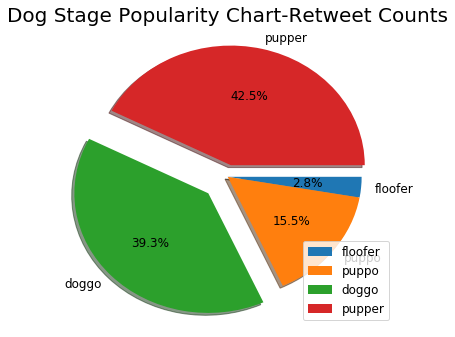

In [94]:
values=twitter_archive_master.groupby(['dog_stage']).retweet_count.sum().sort_values()
#twitter_archive_master.dog_stage.value_counts()
labels=['floofer', 'puppo', 'doggo', 'pupper']

plt.rcParams['font.size'] = '12'
fig, ax=plt.subplots(figsize=[6,5.5])

explode = (0, 0, 0.2, 0.1)
plt.pie(values, explode=explode,labels=labels, counterclock=False, shadow=True, autopct='%1.1f%%')
plt.title('Dog Stage Popularity Chart-Retweet Counts', fontsize=20)
plt.legend(labels, loc=4)
plt.show()

The retweet counts pie chart shows that the most popular dog stage is pupper, which is has 42.5 percent populaity. The second is doggo, followed by puppo and lastly floofer, whose popularity is 2.8 percent

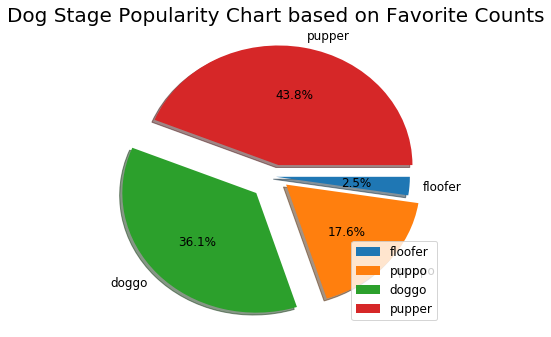

In [95]:
values=twitter_archive_master.groupby(['dog_stage']).favorite_count.sum().sort_values()
#twitter_archive_master.dog_stage.value_counts()
labels=['floofer', 'puppo', 'doggo', 'pupper']

plt.rcParams['font.size'] = '12'
fig, ax=plt.subplots(figsize=[6,5.5])

explode = (0, 0.1, 0.2, 0.1)
plt.pie(values, explode=explode,labels=labels, counterclock=False, shadow=True, autopct='%1.1f%%')
plt.title('Dog Stage Popularity Chart based on Favorite Counts', fontsize=20)
plt.legend(labels, loc=4)
plt.show()

In this case, favorite counts pie chart still shows that the most popular dog stage is pupper with popularity at 43.8 percent, which 1.3 percent increase from the previous pie chart. Doggo is still second most popular dog stage, the percentage has reduced from 39.3 percent for retweet counts to 36.1 percent for favourite counts.

In [96]:
twitter_archive_master.groupby(['dog_stage']).favorite_count.sum().sort_values()

dog_stage
floofer      92442
puppo       657013
doggo      1346378
pupper     1634828
Name: favorite_count, dtype: int64

From the above output, pupper dog stage has the highest sum of of favorite counts

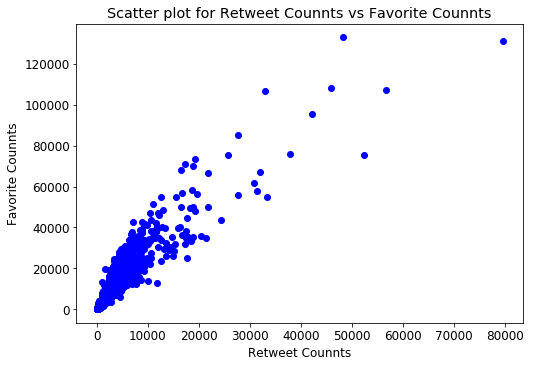

In [97]:
# plot scatter plot for Retweet Counnts vs favorite Counnts
x=twitter_archive_master.retweet_count
y=twitter_archive_master.favorite_count

fig, ax=plt.subplots(figsize=[8,5.5])
plt.rcParams['font.size'] = '12' # Set general font size

plt.scatter(x,y,color='blue')
plt.title('Scatter plot for Retweet Counnts vs Favorite Counnts')
plt.xlabel('Retweet Counnts')
plt.ylabel('Favorite Counnts')
plt.show()

There is strong linear correlation between retweet counnts and favorite counnts

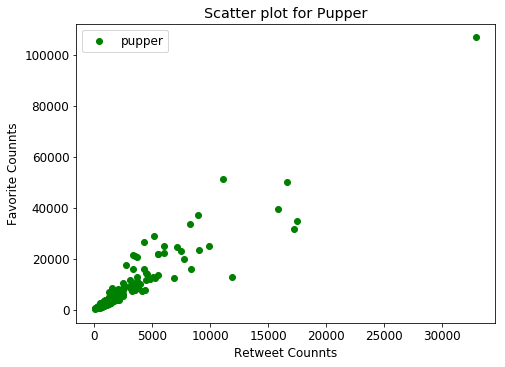

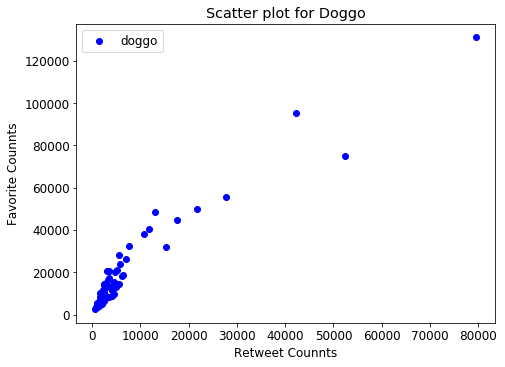

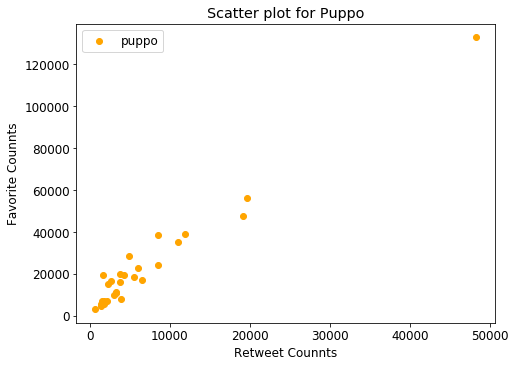

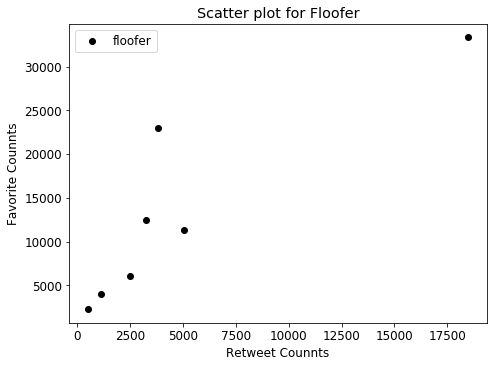

In [98]:
# plot scatter plots for retweet counnts and favorite counnts for each dog stage
x1=twitter_archive_master[twitter_archive_master.dog_stage=='pupper'].retweet_count
y1=twitter_archive_master[twitter_archive_master.dog_stage=='pupper'].favorite_count

x2=twitter_archive_master[twitter_archive_master.dog_stage=='doggo'].retweet_count
y2=twitter_archive_master[twitter_archive_master.dog_stage=='doggo'].favorite_count

x3=twitter_archive_master[twitter_archive_master.dog_stage=='puppo'].retweet_count
y3=twitter_archive_master[twitter_archive_master.dog_stage=='puppo'].favorite_count

x4=twitter_archive_master[twitter_archive_master.dog_stage=='floofer'].retweet_count
y4=twitter_archive_master[twitter_archive_master.dog_stage=='floofer'].favorite_count

plt.rcParams["figure.figsize"] = [7.5, 5.5]
plt.rcParams["figure.autolayout"] = False
plt.rcParams['font.size'] = '12' # Set general font size

labels='pupper'
plt.scatter(x1,y1, color='green')
plt.title('Scatter plot for Pupper')
plt.xlabel('Retweet Counnts')
plt.ylabel('Favorite Counnts')
plt.legend([labels], loc=0)
plt.show()

labels='doggo'
plt.scatter(x2,y2,color='blue')
plt.title('Scatter plot for Doggo')
plt.xlabel('Retweet Counnts')
plt.ylabel('Favorite Counnts')
plt.legend([labels], loc=0)
plt.show()

labels='puppo'
plt.scatter(x3,y3,color='orange')
plt.title('Scatter plot for Puppo')
plt.xlabel('Retweet Counnts')
plt.ylabel('Favorite Counnts')
plt.legend([labels], loc=0)
plt.show()

labels='floofer'
plt.scatter(x4,y4,color='black')
plt.title('Scatter plot for Floofer')
plt.xlabel('Retweet Counnts')
plt.ylabel('Favorite Counnts')
plt.legend([labels], loc=0)
plt.show()

From the output, there is strong linear correlation between retweet counnts and favorite counnts for each dog stage

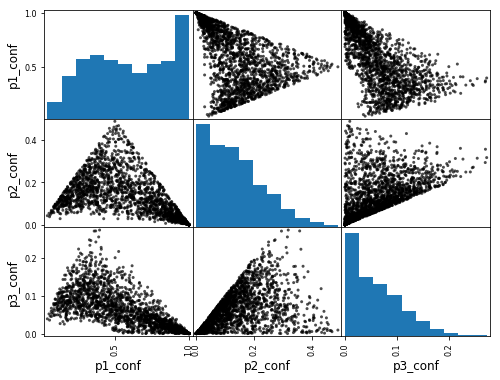

In [99]:
# plot scatter matrix
histogram=twitter_archive_master[['p1_conf','p2_conf','p3_conf']]

plt.rcParams["figure.figsize"] = [8, 6]
plt.rcParams['font.size'] = '12' # Set general font size

pd.plotting.scatter_matrix(histogram, color='black', alpha=0.7)
plt.show()

The distributions are all skewed. p1 is left skewed, while p2 and p3 are right skewed

Next, I want to get the most common dog breed

In [100]:
twitter_archive_breed_type=twitter_archive_master.copy() # make copy of twitter_archive_master

In [101]:
# put p1, p2 and p3 into one group known as breed type using melt method
twitter_archive_breed_type=twitter_archive_breed_type.melt(id_vars=['tweet_id', 'timestamp', 'dog_name', 'dog_stage','retweet_count', 'favorite_count', 
                 'rating_numerator', 'rating_denominator','p1_conf','p1_dog','p2_conf', 
                 'p2_dog', 'p3_conf', 'p3_dog','image_link', 'number_of_images',
                     'tweet_text', 'expanded_urls'], 
            value_vars=['p1', 'p2', 'p3'], 
            var_name='to_be_removed1', value_name='breed_type')
twitter_archive_breed_type.drop('to_be_removed1', axis=1, inplace=True)

In [102]:
twitter_archive_breed_type.drop_duplicates(inplace=True) # remove duplicates

In [103]:
twitter_archive_breed=twitter_archive_breed_type.copy() # make copy

In [104]:
# put 'p1_dog', 'p2_dog', 'p3_dog' into one column called breed using melt method
twitter_archive_breed=twitter_archive_breed_type.melt(id_vars=['tweet_id', 'timestamp', 'dog_name', 'dog_stage','retweet_count', 'favorite_count', 
                 'rating_numerator', 'rating_denominator','p1_conf','p2_conf', 'p3_conf', 
                                                          'image_link', 'number_of_images',
                     'tweet_text', 'expanded_urls', 'breed_type'], 
            value_vars=['p1_dog', 'p2_dog', 'p3_dog'], 
            var_name='to_be_removed2', value_name='breed')
twitter_archive_breed.drop('to_be_removed2', axis=1, inplace=True)

In [105]:
twitter_archive_breed.drop_duplicates(subset='tweet_id',inplace=True) # remove duplicates if any

In [106]:
# select only those which are dog breed
breed=twitter_archive_breed[twitter_archive_breed.breed==True].breed_type.value_counts()

In [107]:
breed

golden_retriever               139
labrador_retriever              95
pembroke                        88
chihuahua                       79
pug                             54
chow                            41
samoyed                         40
toy_poodle                      38
pomeranian                      38
malamute                        29
cocker_spaniel                  27
french_bulldog                  26
chesapeake_bay_retriever        23
miniature_pinscher              22
german_shepherd                 20
siberian_husky                  20
staffordshire_bullterrier       19
maltese_dog                     18
shetland_sheepdog               18
eskimo_dog                      18
rottweiler                      17
cardigan                        17
beagle                          17
shih-tzu                        17
italian_greyhound               16
kuvasz                          16
lakeland_terrier                16
west_highland_white_terrier     14
great_pyrenees      

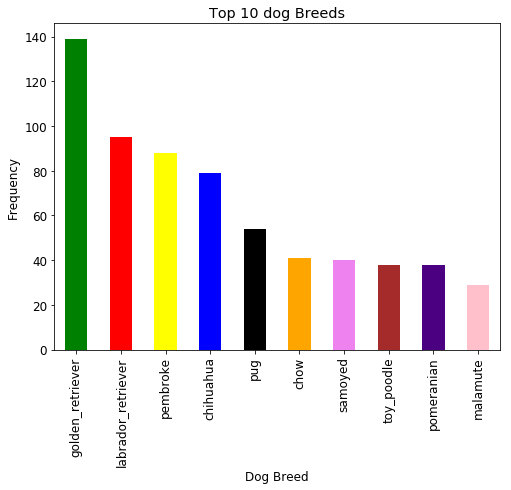

In [108]:
# plot bar graph
color=['green', 'red', 'yellow', 'blue', 'black', 'orange', 'violet', 'brown', 'indigo', 'pink']
breed[breed>27].plot('bar', color=color)
plt.title('Top 10 dog Breeds')
plt.xlabel('Dog Breed')
plt.ylabel('Frequency')
plt.show()

The most common dog breed is golden retriever, interms of the number of image predictions. The second most popular dog breed is Labrador Retriever, followed by Pembroke and finaly by Chihuahua